C:\Users\aikid\AppData\Local\Temp\ipykernel_8204\2743015097.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  seattle_city["DATE"]= pd.to_datetime(seattle_city["DATE"])


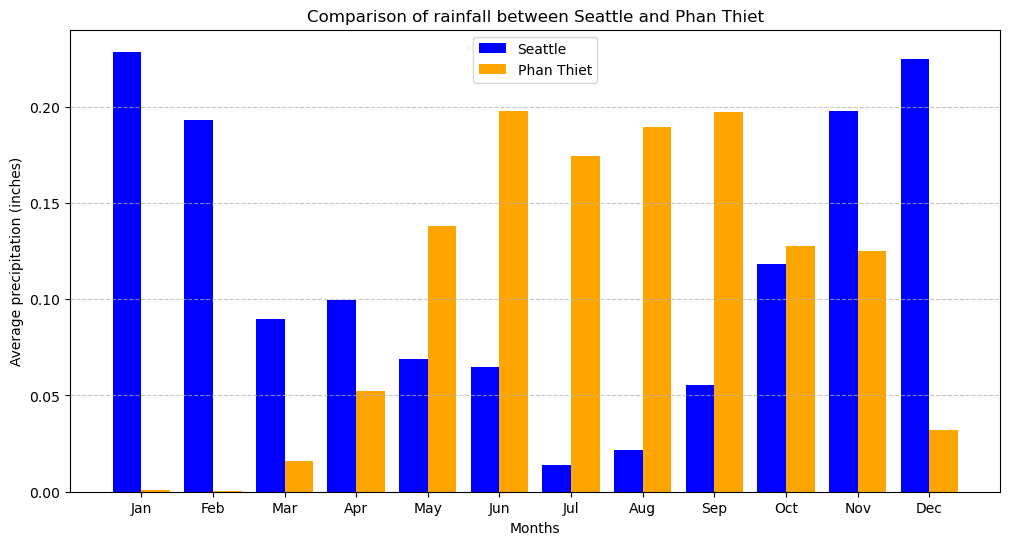

<Figure size 1200x600 with 0 Axes>

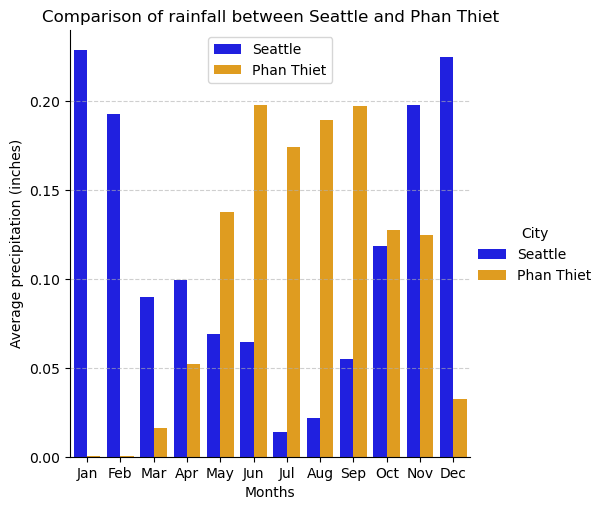

In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
seattle_city= pd.read_csv("https://raw.githubusercontent.com/devlinhoang-cyber/Weather/refs/heads/main/Data/seattle_rain.csv")
phanthiet_city= pd.read_csv("https://raw.githubusercontent.com/devlinhoang-cyber/Weather/refs/heads/main/Data/Phan%20Thiet%20station.csv")

#Convert date to datetime:
seattle_city["DATE"]= pd.to_datetime(seattle_city["DATE"])
phanthiet_city["DATE"]=pd.to_datetime(phanthiet_city["DATE"])

#Group months and average:
seattle_avg_precipitation= seattle_city.groupby(seattle_city["DATE"].dt.month)['PRCP'].mean()
phanthiet_avg_precipitation= phanthiet_city.groupby(phanthiet_city["DATE"].dt.month)['PRCP'].mean()

#Data clean up
seattle_df= seattle_avg_precipitation.reset_index()
seattle_df['City']= 'Seattle'
seattle_df.rename(columns={"DATE": "Month", "PRCP": "Precipitation" }, inplace=True)

phanthiet_df= phanthiet_avg_precipitation.reset_index()
phanthiet_df['City']= 'Phan Thiet'
phanthiet_df.rename(columns={"DATE": "Month", "PRCP": "Precipitation" }, inplace=True)

rainfall= pd.concat([seattle_df, phanthiet_df])


#Plot side by side bar graph
months= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
rainfall['Months']= rainfall['Month'].apply(lambda x: months[int(x)-1])

#Graph with Mathlib
plt.figure(figsize=(12,6))
x= np.arange(len(months))
width=0.4
plt.bar(x-width/2, seattle_avg_precipitation, width, label="Seattle", color= "blue")
plt.bar(x+width/2, phanthiet_avg_precipitation, width, label="Phan Thiet", color="orange")
#Plot labelling
plt.xticks(x,months)
plt.xlabel('Months')
plt.ylabel('Average precipitation (inches)')
plt.title('Comparison of rainfall between Seattle and Phan Thiet')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Graph with seaborn
plt.figure(figsize=(12,6))
sns.catplot(
    data=rainfall,
    x='Months', y='Precipitation', hue='City',    palette= ['blue', 'orange'], kind='bar'
)
plt.xlabel('Months')
plt.ylabel('Average precipitation (inches)')
plt.title('Comparison of rainfall between Seattle and Phan Thiet')
plt.legend()
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

